In [1]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
        

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Estimator, Options

In [3]:
from qiskit import execute
import math

In [4]:
from qiskit import IBMQ
IBMQ.save_account('75694dc5dfcbc609ca7b9e35b9dccd386f77ad6c25d70d806694b1cbaa89304547bcb49e84d6fb0902b2adb8651075569565c21990248607f5c9d5c5debd06b5')

C:\Users\Tim\AppData\Local\Temp\ipykernel_24840\2380492854.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('75694dc5dfcbc609ca7b9e35b9dccd386f77ad6c25d70d806694b1cbaa89304547bcb49e84d6fb0902b2adb8651075569565c21990248607f5c9d5c5debd06b5')
C:\Users\Tim\AppData\Local\Temp\ipykernel_24840\2380492854.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
 

In [5]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_brisbane
ibm_kyoto
ibm_osaka


In [6]:
brisbane = provider.get_backend('ibm_brisbane')


In code 30 measurement in one circuit, by reset the state to 0 after every measurement.

In [7]:
count_ratio=[]
circ = QuantumCircuit(1, 30)
i=0
for t in range (1,300,10):
    
    t=t/10**6
    
    
    circ.x(0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    circ.measure(0, i)
    i=i+1
    circ.reset(0)
    circ = transpile(circ, osaka)
 #   result_noise = sim_vigo.run(circ).result()
    
    

In [8]:
job = execute(circ,osaka)
result_noise =job.result()
counts_noise = result_noise.get_counts(0)


In [9]:
print(counts_noise)

{'101000110010110010011110000111': 1, '010011100010111110111011011111': 1, '010010011011011111010101011101': 1, '101111110100000100111111110111': 1, '111110110101101100111000011111': 1, '001111110011101111010111011111': 1, '010010001111111101110110011011': 1, '110110100101010110011011111111': 1, '000011011011001011111111110111': 1, '100100011110101101100100111011': 1, '100001101011110111101001111111': 1, '011111101111110111111111110111': 1, '100001101100101001111110111111': 1, '111000011011001111001111111011': 1, '111101110001001010110101111111': 1, '100111101000101011101100111110': 1, '110101011111111011110101111111': 1, '011011111110100011011111111111': 1, '001000100111000110001011111111': 1, '010101101011111101011110111101': 1, '100111010011011111011111111110': 1, '100111011010110101111101110101': 1, '010111001010010100010111110111': 1, '101011110110101010010101111111': 1, '110100000110110110111110101111': 1, '001001011111011111010011111110': 1, '001000111011101111111111110101': 1, 

In [ ]:
print(len(counts_noise))

3998


3998


3998


In [12]:

n = 0
total=np.zeros(30)
for i in counts_noise:
    rev=''.join(reversed(i))
    for j in range(0,30):
        if rev[j] == '1':
            total[j]=total[j]+1
count_ratio=total/3998


In [16]:
print(count_ratio)

[0.97298649 0.93046523 0.8891946  0.85992996 0.85117559 0.81615808
 0.79864932 0.76988494 0.72836418 0.72961481 0.7186093  0.69209605
 0.68734367 0.65507754 0.64282141 0.62506253 0.60305153 0.58354177
 0.56953477 0.55502751 0.55127564 0.53476738 0.52401201 0.51075538
 0.50025013 0.50075038 0.47123562 0.45172586 0.44347174 0.44122061]


In [14]:
import matplotlib.pyplot as plt

In [2]:
count_ratio=[0.97298649, 0.93046523, 0.8891946,  0.85992996, 0.85117559, 0.81615808,
 0.79864932, 0.76988494, 0.72836418, 0.72961481, 0.7186093,  0.69209605,
 0.68734367, 0.65507754, 0.64282141, 0.62506253, 0.60305153, 0.58354177,
 0.56953477, 0.55502751, 0.55127564, 0.53476738, 0.52401201, 0.51075538,
 0.50025013, 0.50075038, 0.47123562, 0.45172586, 0.44347174, 0.44122061]

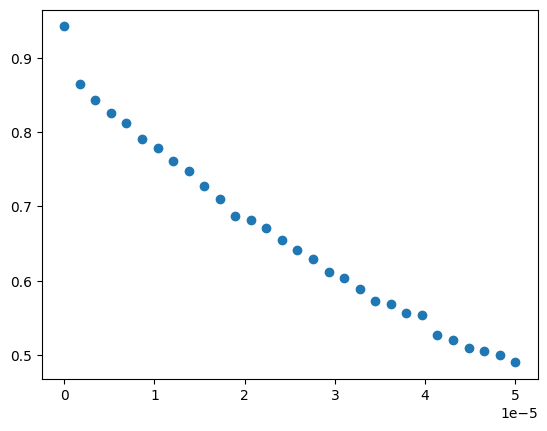

In [16]:
x=np.linspace(0,50*10**-6,30)
plt.scatter(x,count_ratio)
plt.show()

In [8]:
def T1(t, A, T1,B):
    return A*np.exp(-t/T1)+B

In [27]:
from scipy.optimize import curve_fit

In [10]:
popt, pcov = curve_fit(T1, x, count_ratio,p0=[1,10**-4,0], maxfev=5000)

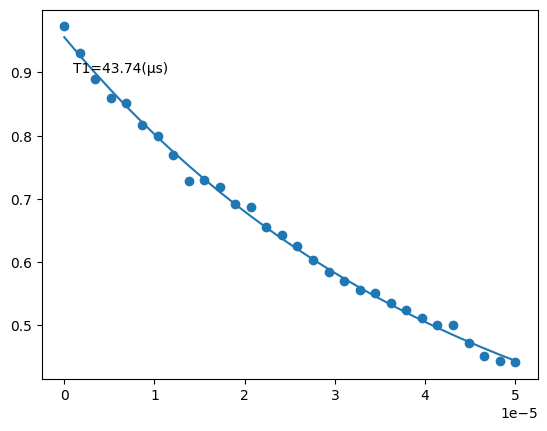

In [11]:
yfit = T1(x,popt[0], popt[1],popt[2])
plt.text(0.000001,0.9,'T1='+str(round(popt[1]*10**6,2))+'(μs)')
plt.plot(x,yfit)
plt.scatter(x,count_ratio)

In [13]:
import math

In [17]:
count_ratio=[]
circ=QuantumCircuit(1,30)
i=0
for t in range(1,300,10):
    t=t/10**6
    
    circ.rx(math.pi/2,0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    #circ.rz(math.pi/5,0)
    #circ.rz(math.pi*t*10**5,0)
    circ.barrier(0)
    circ.x(0)
    circ.barrier(0)
#    circ.rz(-math.pi*t*10**5,0)
    circ.barrier(0)
    circ.delay(t, unit='s')
    circ.barrier(0)
    circ.rx(math.pi/2,0)
    circ.barrier(0)
    circ.measure(0, i)
    i=i+1
    circ.reset(0)
circ = transpile(circ, brisbane)
   
    

In [18]:
job = execute(circ,brisbane)
result_noise =job.result()
counts_noise = result_noise.get_counts(0)

In [19]:
print(len(counts_noise))

4000


In [24]:
n = 0
total=np.zeros(30)
for i in counts_noise:
    rev=''.join(reversed(i))
    for j in range(0,30):
        if rev[j] == '0':
            total[j]=total[j]+1
count_ratio=total/4000

In [21]:
import matplotlib.pyplot as plt


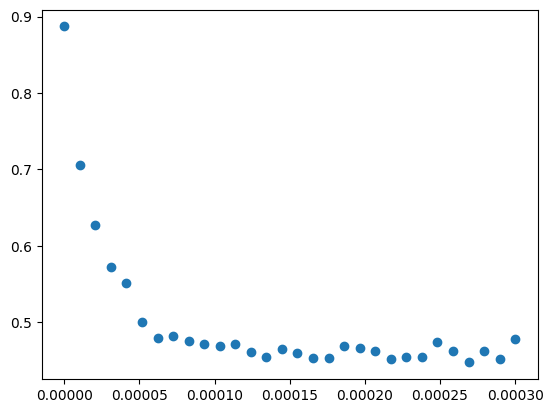

In [25]:
x=np.linspace(0,300*10**-6,30)
plt.scatter(x,count_ratio)
plt.show()

In [28]:
def T2(t, A, T2,B):
    return A*np.exp(-t/T2)+B
popt, pcov = curve_fit(T2, x, count_ratio,p0=[1,10**-5,0], maxfev=5000)

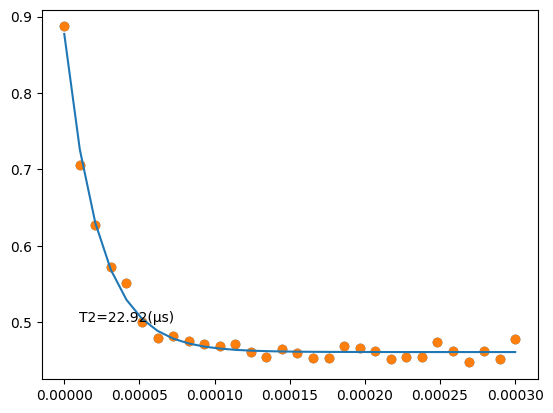

In [30]:
x=np.linspace(0,300*10**-6,30)
yfit = T2(x,popt[0], popt[1],popt[2])

plt.plot(x,yfit)
plt.scatter(x,count_ratio)
plt.scatter(x,count_ratio)
plt.text(0.00001,0.5,'T2='+str(round(popt[1]*10**6,2))+'(μs)')
plt.show()